# Models enumeration 01

Raw images (no bounding box)

In [1]:
import os
import torch
from torchvision.datasets import ImageFolder

import my_paths

from my_sysinfo import get_device

import my_transforms

import my_models

from my_train_model import training_loop

from my_test_model import test_model

In [2]:
BATCH_SIZE = 128
NUM_WORKERS = 2

In [3]:
def validate_model(model_id, make_model, train_data_path, test_data_path, transforms, test_transforms, loops):
    SAVED_MODEL_PATH = os.path.join(my_paths.models, model_id + '.pth')
    device = get_device()
    model = make_model(device)

    if os.path.exists(SAVED_MODEL_PATH):
        model.load_state_dict(torch.load(SAVED_MODEL_PATH))
    else:
        train_dataset = ImageFolder(train_data_path, transform=transforms)
        train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
        training_loop(loops, model, train_data_loader, device)
        torch.save(model.state_dict(), SAVED_MODEL_PATH)

    test_dataset = ImageFolder(test_data_path, transform=test_transforms)
    test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    
    test_model(model, test_data_loader, device)

## 1. Custom CNN raw augmented images given split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


C:\Users\lootman\AppData\Local\Temp\ipykernel_31436\2635701192.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(SAVED_MODEL_PATH))


images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]) labels: torch.Size([128])
outputs: torch.Size([128, 40]) matches: 0
images: torch.Size([128, 3, 400, 400]

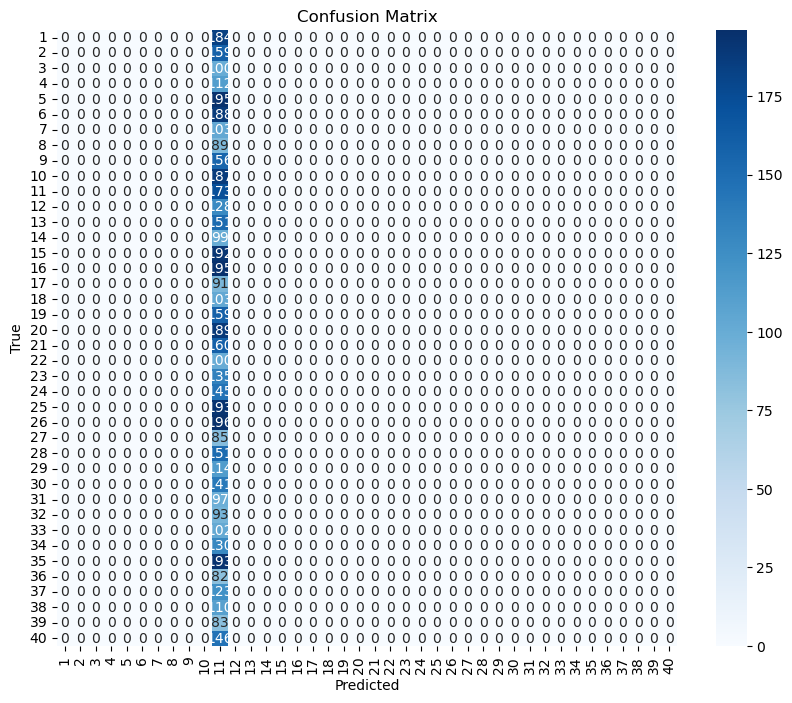

In [4]:
validate_model(
    'custom-given-raw-augmented',
    my_models.customcnn.make_model,
    my_paths.given_splits_train,
    my_paths.given_splits_test,
    my_transforms.get_augmented_transforms(),
    my_transforms.get_transforms(),
    10
)

## 2. Custom CNN raw augmented images random split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda
Epoch 1 started.
loss: 3.685537  [  128/ 7668]
loss: 3.689006  [  768/ 7668]
loss: 3.667488  [ 1408/ 7668]
loss: 3.679646  [ 2048/ 7668]
loss: 3.665803  [ 2688/ 7668]
loss: 3.663517  [ 3328/ 7668]
loss: 3.683022  [ 3968/ 7668]
loss: 3.647018  [ 4608/ 7668]
loss: 3.653097  [ 5248/ 7668]
loss: 3.648702  [ 5888/ 7668]
loss: 3.645901  [ 6528/ 7668]
loss: 3.650053  [ 7168/ 7668]
Epoch 1 completed. Loss: 3.6847124099731445
Epoch 2 started.
loss: 3.650640  [  128/ 7668]
loss: 3.660576  [  768/ 7668]
loss: 3.647030  [ 1408/ 7668]
loss: 3.626736  [ 2048/ 7668]
loss: 3.662749  [ 2688/ 7668]
loss: 3.640786  [ 3328/ 7668]
loss: 3.617772  [ 3968/ 7668]
loss: 3.536910  [ 4608/ 7668]
loss: 3.645438  [ 5248/ 7668]
loss: 3.586814  [ 5888/ 7668]
loss: 3.588782  [ 6528/ 7668]
loss: 3.626039  [ 7168/ 7668]
Epoch 2 completed. Loss: 3.567747116088867
Epoch 3 started.
loss: 3.611993  [  128/ 

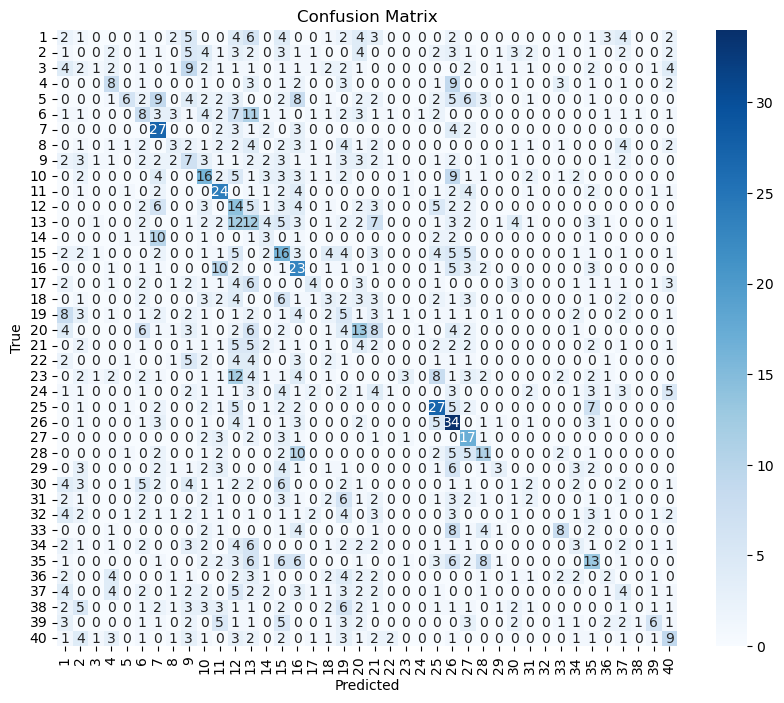

In [5]:
validate_model(
    'custom-random-raw-augmented',
    my_models.customcnn.make_model,
    my_paths.random_splits_train,
    my_paths.random_splits_test,
    my_transforms.get_augmented_transforms(),
    my_transforms.get_transforms(),
    10
)

## 3. Custom CNN raw images given split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda
Epoch 1 started.
loss: 3.692391  [  128/ 4000]
loss: 3.691742  [  768/ 4000]
loss: 3.684458  [ 1408/ 4000]
loss: 3.674772  [ 2048/ 4000]
loss: 3.693893  [ 2688/ 4000]
loss: 3.689767  [ 3328/ 4000]
loss: 3.687050  [ 3968/ 4000]
Epoch 1 completed. Loss: 3.698105812072754
Epoch 2 started.
loss: 3.685542  [  128/ 4000]
loss: 3.699177  [  768/ 4000]
loss: 3.685549  [ 1408/ 4000]
loss: 3.689568  [ 2048/ 4000]
loss: 3.687232  [ 2688/ 4000]
loss: 3.684546  [ 3328/ 4000]
loss: 3.665147  [ 3968/ 4000]
Epoch 2 completed. Loss: 3.6068475246429443
Epoch 3 started.
loss: 3.727984  [  128/ 4000]
loss: 3.643493  [  768/ 4000]
loss: 3.668189  [ 1408/ 4000]
loss: 3.657376  [ 2048/ 4000]
loss: 3.695500  [ 2688/ 4000]
loss: 3.641420  [ 3328/ 4000]
loss: 3.623605  [ 3968/ 4000]
Epoch 3 completed. Loss: 3.569840669631958
Epoch 4 started.
loss: 3.581246  [  128/ 4000]
loss: 3.512766  [  768/ 

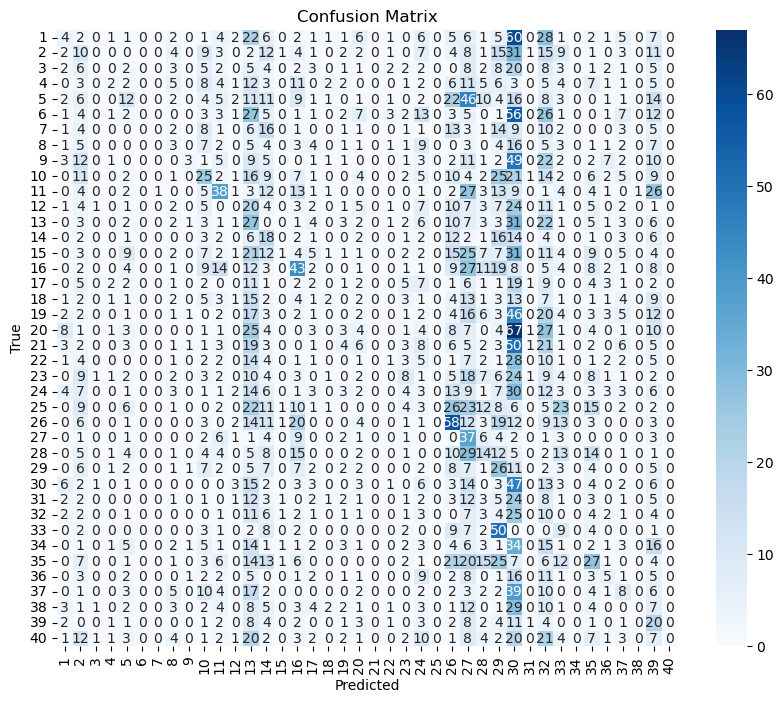

In [6]:
validate_model(
    'custom-given-raw',
    my_models.customcnn.make_model,
    my_paths.given_splits_train,
    my_paths.given_splits_test,
    my_transforms.get_transforms(),
    my_transforms.get_transforms(),
    5
)

## 4. Custom CNN raw images random split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda
Epoch 1 started.
loss: 3.686180  [  128/ 7668]
loss: 3.697257  [  768/ 7668]
loss: 3.676435  [ 1408/ 7668]
loss: 3.690933  [ 2048/ 7668]
loss: 3.681744  [ 2688/ 7668]
loss: 3.686422  [ 3328/ 7668]
loss: 3.671948  [ 3968/ 7668]
loss: 3.674702  [ 4608/ 7668]
loss: 3.632921  [ 5248/ 7668]
loss: 3.635746  [ 5888/ 7668]
loss: 3.684204  [ 6528/ 7668]
loss: 3.573924  [ 7168/ 7668]
Epoch 1 completed. Loss: 3.621157646179199
Epoch 2 started.
loss: 3.565011  [  128/ 7668]
loss: 3.488901  [  768/ 7668]
loss: 3.506066  [ 1408/ 7668]
loss: 3.607877  [ 2048/ 7668]
loss: 3.635465  [ 2688/ 7668]
loss: 3.574489  [ 3328/ 7668]
loss: 3.507065  [ 3968/ 7668]
loss: 3.467956  [ 4608/ 7668]
loss: 3.567855  [ 5248/ 7668]
loss: 3.543744  [ 5888/ 7668]
loss: 3.425318  [ 6528/ 7668]
loss: 3.387949  [ 7168/ 7668]
Epoch 2 completed. Loss: 3.553748369216919
Epoch 3 started.
loss: 3.508455  [  128/ 7

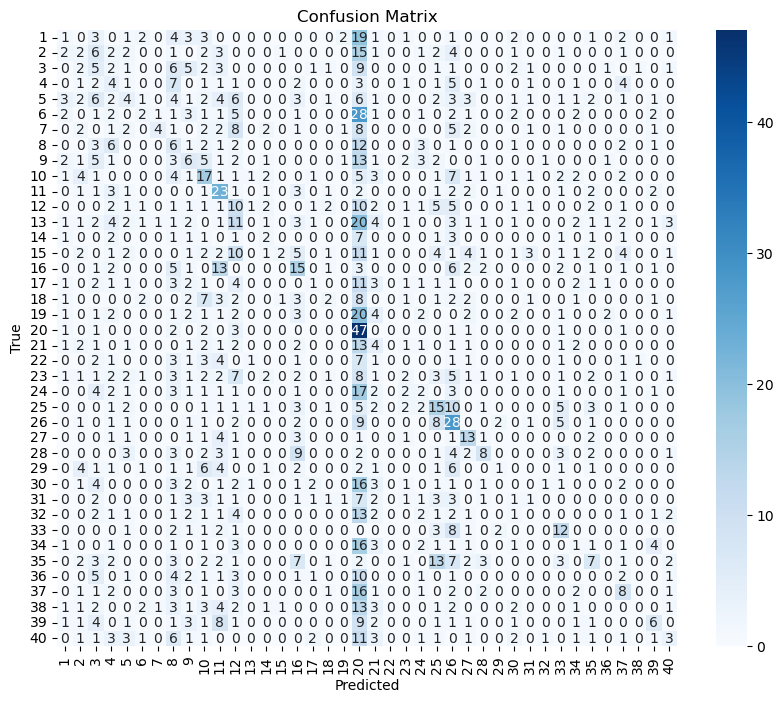

In [7]:
validate_model(
    'custom-random-raw',
    my_models.customcnn.make_model,
    my_paths.random_splits_train,
    my_paths.random_splits_test,
    my_transforms.get_transforms(),
    my_transforms.get_transforms(),
    5
)